In [1]:
# Import main packages 
from tilepy.include.ObservationScheduler import GetSchedule
from tilepy.include.PointingTools import ObservationParameters, NextWindowTools, getdate
import time
import argparse
import os
from pathlib import Path


/opt/miniconda3/envs/tilepy2/lib/python3.11/site-packages/ligo/lw/lsctables.py:89: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal
/opt/miniconda3/envs/tilepy2/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Set of inputs needed to run the code

In [3]:
from astropy.io import fits
import matplotlib.pyplot as plt
skymap = '../sciencecases/927563_lalinference/support/927563_lalinference.fits.gz'
hdul = fits.open(skymap)
print(hdul[1].header)

XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                16384 / length of dimension 1                          NAXIS2  =                 3072 / length of dimension 2                          PCOUNT  =                    0 / number of group parameters                     GCOUNT  =                    1 / number of groups                               TFIELDS =                    4 / number of table fields                         TTYPE1  = 'PROB    '                                                            TFORM1  = '1024E   '                                                            TUNIT1  = 'pix-1   '                                                            TTYPE2  = 'DISTMU  '                                                            TFORM2  = '1024E   '                    

In [16]:
# The url to the FITS file with the sky localization, e.g.for GW https://urlpath/Bayestar.fits.gz'
# Local file with 3D localization
skymap = '../sciencecases/927563_lalinference/support/927563_lalinference.fits.gz'
obsTime = getdate("2023-03-15 10:30:01")
pointingsFile = '/Users/mseglar/GitHub/tilepy/examples/launcher/output/coinc_event:coinc_event_id:927563/PGallinFoVintegrated/SuggestedPointings_GalProbOptimisation_1stround.txt'


# BBH with 2D localization
#skymap = 'https://gracedb.ligo.org/api/superevents/S250328ae/files/Bilby.multiorder.fits,0'
#obsTime = getdate("2025-03-28 19:10:00")
#pointingsFile = '/Users/mseglar/GitHub/tilepy/examples/launcher/output/S250328ae/SuggestedPointings_2DProbOptimisation_firstRound.txt'
#pointingsFile = None

# Date and time of the event in format YYYY-MM-DD HH:MM:SS. You can use 2023-07-15 14:30:10 for the example .fits file


# Path to the input datasets (where galaxy cat should be for GW case)
datasetDir = '../../src/tilepy/dataset/'

# Path to the output folder
outDir = './output'

# Config file for the tiling scheduling
cfgFile = '../config/FollowupParameters_LST.ini'

# Galaxy catalog name (if no catalog is given, the approach will be 2D). Path to th file is defined in datasetDir variable
galcatName = 'Gladeplus.h5'

# Tiles already observed




In [17]:
#Parse the parameters 
obspar = ObservationParameters()
obspar.add_parsed_args(skymap,obsTime,datasetDir,galcatName,outDir,pointingsFile)
obspar.from_configfile(cfgFile)

In [18]:
print(obspar)

============== Main parsed observation parameters ==============  
Observatory Name: LST
Event Name: None
Observatory: 28.761944 deg
Observatory: -17.89 deg
Observatory: 2200.0 m
Max zenith: 70
Using Greytime is: False
FOV: 2.5
Max runs: 4
Duration: 20
High Resolution NSIDE: 512
Low Resolution NSIDE: 256
The strategy is (3D, integrated, mangrove=False)
The level of details is (doPlot=True, doRank = True)



### Run the scheduling

Starting the 3D pointing calculation with the following parameters

Filename:  coinc_event:coinc_event_id:927563
Date:  2023-03-15 10:30:01
Previous pointings:  /Users/mseglar/GitHub/tilepy/examples/launcher/output/coinc_event:coinc_event_id:927563/PGallinFoVintegrated/SuggestedPointings_GalProbOptimisation_1stround.txt
Catalog:  ../../src/tilepy/dataset/Gladeplus.h5
Dataset:  ../../src/tilepy/dataset/
Output:  ./output/coinc_event:coinc_event_id:927563
90% area = 398.1792648366667. 50% area = 121.42218532828433

============== Main parsed observation parameters ==============  
Observatory Name: LST
Event Name: coinc_event:coinc_event_id:927563
Observatory: 28.761944 deg
Observatory: -17.89 deg
Observatory: 2200.0 m
Max zenith: 70
Using Greytime is: False
FOV: 2.5
Max runs: 4
Duration: 20
High Resolution NSIDE: 512
Low Resolution NSIDE: 256
The strategy is (3D, integrated, mangrove=False)
The level of details is (doPlot=True, doRank = True)

Loading galaxy catalogue from ../../src/til

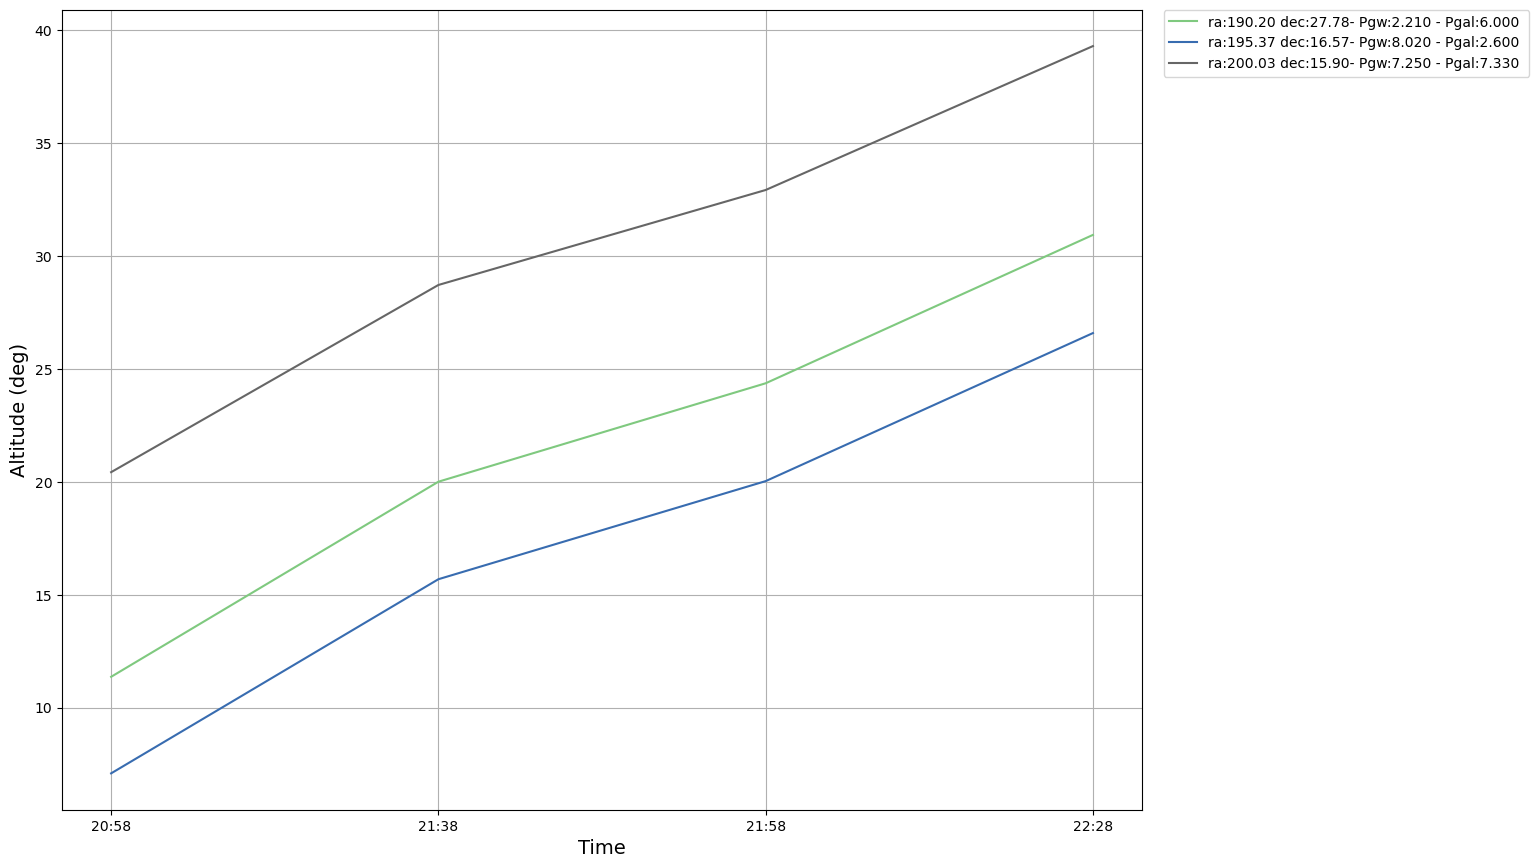

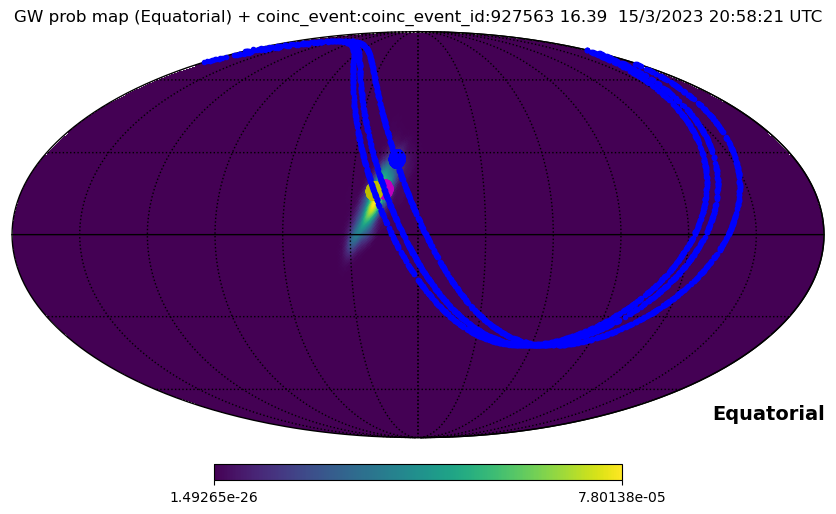

In [19]:
# Run the scheduler
GetSchedule(obspar)